In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import math
#import tensorflow.compat.v1 as tf
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv(r"C:\Users\Fredrick.Alli\OneDrive - Badger Medical\TTCC.csv")

In [3]:
#To print the first 5 rows
data.head()

,Date,Total Cases
0,01/01/2022,411
1,02/01/2022,408
2,03/01/2022,435
3,04/01/2022,200
4,05/01/2022,242


In [4]:
#To print the last 5 rows
data.tail()

,Date,Total Cases
767,08/02/2024,278
768,09/02/2024,207
769,10/02/2024,714
770,11/02/2024,518
771,12/02/2024,186


In [5]:
#To see the data types 
data.dtypes

Date           object
Total Cases     int64
dtype: object

In [6]:
#Convert 'Date' column data type from object to datetime 
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [7]:
#To see if the data types have changed 
data.dtypes

Date           datetime64[ns]
Total Cases             int64
dtype: object

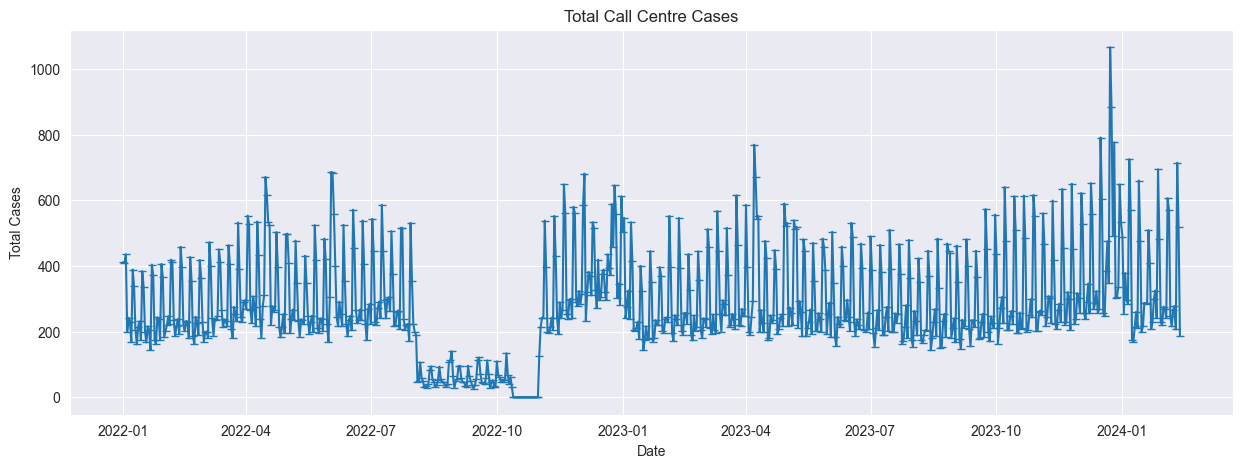

In [8]:
#Setting the plot size
plt.figure(figsize=(15, 5))

color_pal = sns.color_palette()

#Plotting the data 
#using trendline for the line style and marker for data point style 
plt.plot(data['Date'], data['Total Cases'], linestyle='-', marker='_', color=color_pal[0])

#Adding Title and Labels 
plt.title('Total Call Centre Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')

#Adding grid lines for better readability
plt.grid(True)

#Show the plot 
plt.show()

Testing for stationarlity

In [9]:
from statsmodels.tsa.stattools import adfuller 

In [10]:
test_result=adfuller(data['Total Cases'])

In [11]:
#It is stationary
#It is not stationary 

def adfuller_test(Total_Cases):
    result = adfuller(Total_Cases)
    labels = ['ADF', 'p-value', 'Lags used', 'Number of Observations used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root is stationary")
    else: print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [12]:
adfuller_test(data['Total Cases'])

ADF: -2.553038790157294
p-value: 0.1030967288077222
Lags used: 21
Number of Observations used: 750
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


The hypothesis means the data is non stationary because it is > 0.05

Now, the data is non-stationary there are seven things we could actually do. 

Differencing the data: One common method to achieve stationarity is to difference the data. This involves subtracting the previous observation from the current observation. Sometimes, more than one round of differencing may be required. 

Transformation: Applying transformation such as logarithmic, square root or box-cox transformation can also hekp stabilise the variance of the time series and make it more stationary. 

Removing trends and seasonality: If the non-stationarity is due to a trend or seasonality, you might consider detrending or deaseasonalising the data. This can be done by model fitting or by using methods like Seasonal Decomposition. 

Re-test for stationarity: After applying the the transformations or differencing , you shpould re-run the ADF test to check if the data has become stationary. 

Model Building: Once the data is stationary, proceed to build time series forecasting nmodels such as ARIMA and SARIMA OR machine learning models depending on the nature of your data and the specific requirement of my analysis. 

Model Validation:  Validating the mdoel by checking its performance on unseen data. Use metrics like RMSE, MAE or MAPE to evaluate the forecasting accuracy. 

Forecasting: Use of validating models to forecast values. 

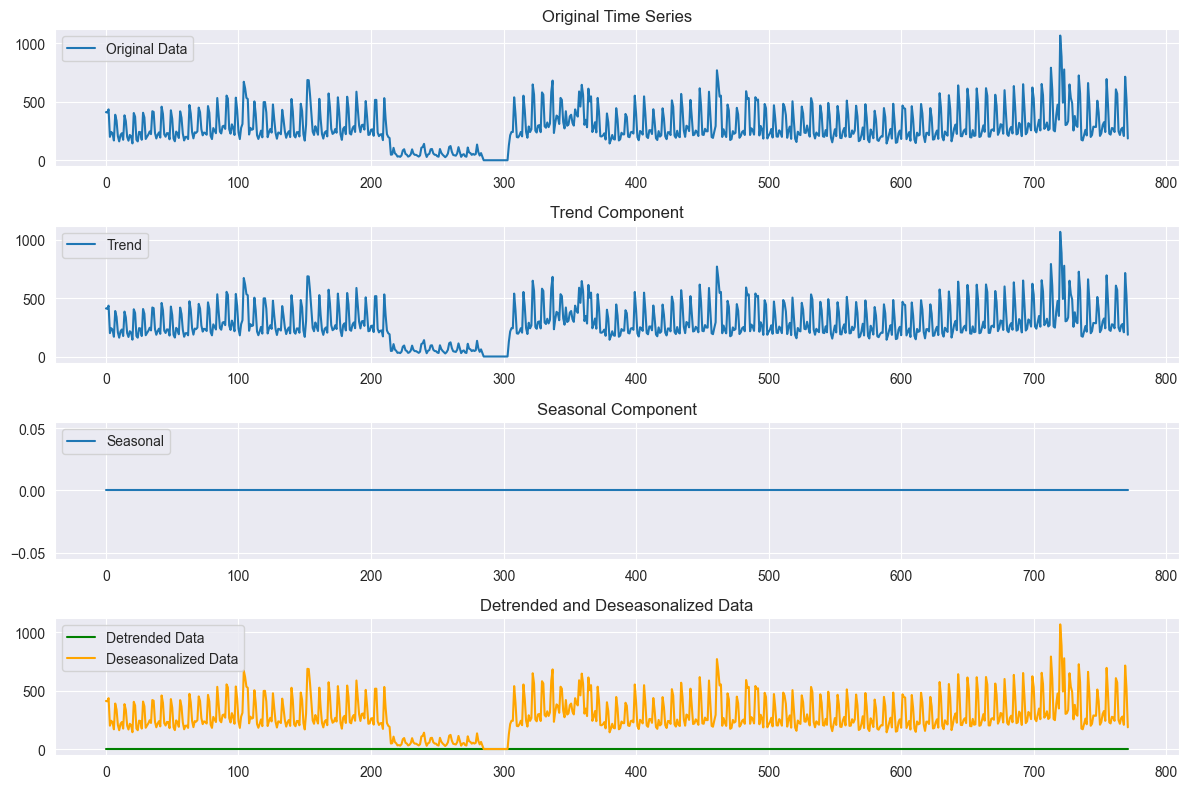

In [13]:
import statsmodels.api as sm

# Assuming you have your time series data in a variable called 'Total_Cases'
# You can use pandas to create a time series object if it's not already

Total_Cases = pd.Series(data['Total Cases'])

# To manually specify the frequency (assuming daily data)
period = 1

# Seasonal Decomposition using STL
decomposition = sm.tsa.seasonal_decompose(Total_Cases, model='additive', period=period)

# Detrended data
detrended_data = Total_Cases - decomposition.trend

# Deseasonalized data
deseasonalized_data = Total_Cases - decomposition.seasonal

# Plot the original, trend, seasonal, and detrended/deseasonalized data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(Total_Cases, label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(detrended_data, label='Detrended Data', color='green')
plt.plot(deseasonalized_data, label='Deseasonalized Data', color='orange')
plt.legend(loc='upper left')
plt.title('Detrended and Deseasonalized Data')

plt.tight_layout()
plt.show()

After Detrending the data You can print out the Adf test results

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the detrended and deseasonalized data
adf_result = adfuller(deseasonalized_data)

# Extract and print the ADF test statistics
adf_statistic = adf_result[0]
p_value = adf_result[1]
lags_used = adf_result[2]
obs_used = adf_result[3]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags_used}')
print(f'Number of Observations Used: {obs_used}')

# Interpret the results
if p_value <= 0.05:
    print(
        "Strong evidence against the null hypothesis(0), reject the null hypothesis. Data has no unit root; it is stationary.")
else:
    print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")


ADF Statistic: -2.553038790157294
p-value: 0.1030967288077222
Lags Used: 21
Number of Observations Used: 750
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


Based on the output, the p-value (0.181) is greater than the significance level of 0.05. Thus, I have weak evidence against the null hypothesis, indicating that the time series still has a unit root and is non-stationary. This interpretation is accurate, and I can continue to analyse the non-stationary time series

<Axes: >

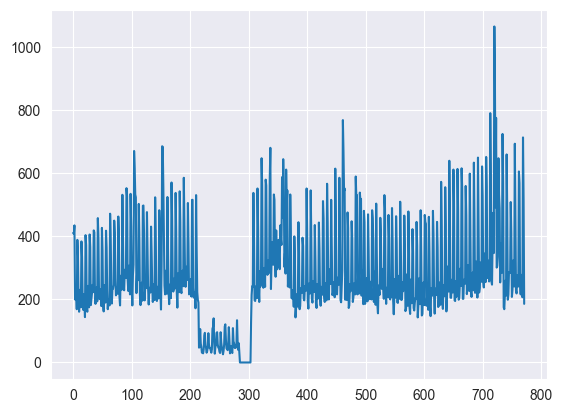

In [15]:
data["Total Cases"].plot(kind='line')

Using Auto-Regressive Model

In [16]:
#Now you need to do auto correlation

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p, d, q 

p stands for AR model lags 
d stands for differencing 
q stands for moving average lag

Plotting the acf and pacf

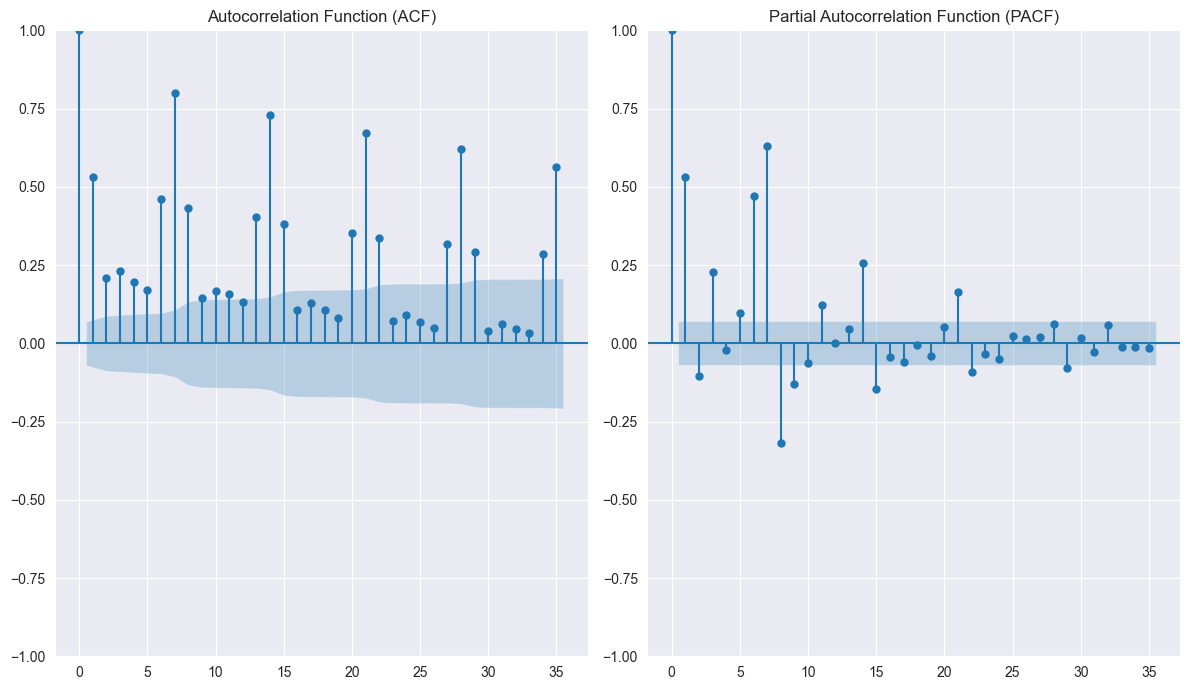

In [17]:
#Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plot_acf(deseasonalized_data, lags=35, ax=plt.gca()) #Adjust the 'lags' parameter as needed
plt.title('Autocorrelation Function (ACF)')

#Plotting the partial autocorrelation function (PACF)
plt.subplot(1, 2, 2)
plot_pacf(deseasonalized_data, lags=35, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

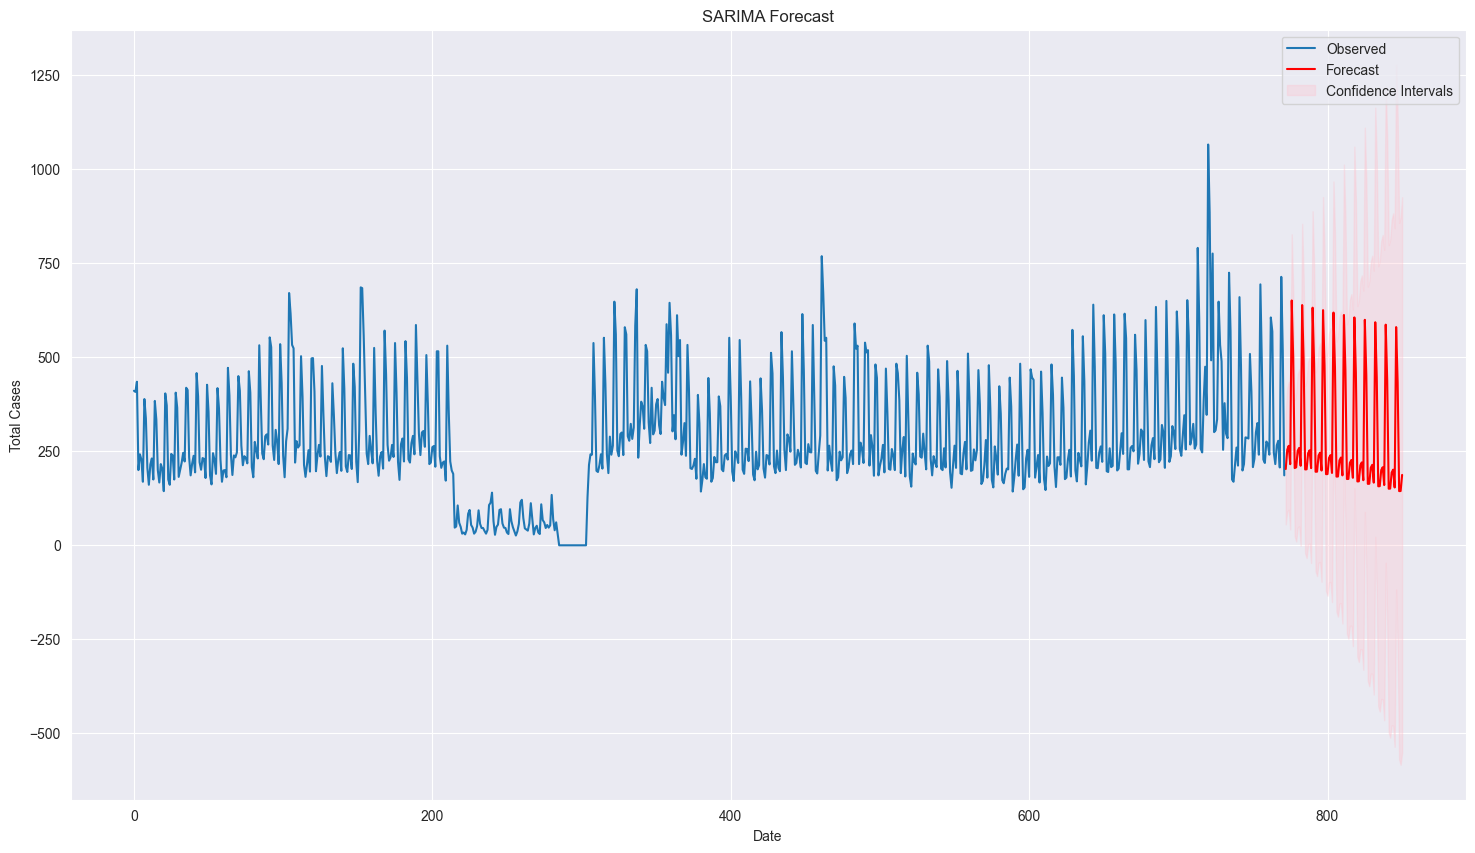

In [18]:
plt.show()
# Define SARIMA hyperparameters (p, d, q, P, D, Q, s)
p = 1  # AR order
d = 1  # Integration order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal Integration order
Q = 1  # Seasonal MA order
s = 7  # Seasonal period (assuming weekly data)

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(data['Total Cases'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Forecast future Total Cases
forecast_steps = 79  # Adjust as needed
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Get the forecasted values, confidence intervals, and prediction intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
lower_bound = confidence_intervals['lower Total Cases']
upper_bound = confidence_intervals['upper Total Cases']

# Plot the forecast
plt.figure(figsize=(18, 10))
plt.plot(data.index, data['Total Cases'], label='Observed')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast')
plt.fill_between(forecast_values.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [19]:
# Print the forecast values
print("Forecasted Values:")
print(forecast_values)

# Print the confidence intervals
print("\nConfidence Intervals:")
print(confidence_intervals)

# Print the lower bounds
print("\nLower Bounds:")
print(lower_bound)

# Print the upper bounds
print("\nUpper Bounds:")
print(upper_bound)

Forecasted Values:
772    202.859753
773    253.875719
774    264.611906
775    215.725506
776    651.182920
          ...    
846    580.386299
847    433.256490
848    144.103383
849    144.341367
850    187.224947
Name: predicted_mean, Length: 79, dtype: float64

Confidence Intervals:
     lower Total Cases  upper Total Cases
772          55.606818         350.112689
773          89.800022         417.951416
774          94.579769         434.644044
775          42.264319         389.186694
776         475.059816         827.306023
..                 ...                ...
846        -117.483427        1278.256024
847        -272.530513        1139.043492
848        -569.492642         857.699408
849        -583.647995         872.330728
850        -551.297806         925.747700

[79 rows x 2 columns]

Lower Bounds:
772     55.606818
773     89.800022
774     94.579769
775     42.264319
776    475.059816
          ...    
846   -117.483427
847   -272.530513
848   -569.492642
849   -

To print all the values without space

In [20]:
# Print the forecast values
print("Forecasted Values:")
for value in forecast_values:
    print(value)

# Print the confidence intervals
print("\nConfidence Intervals:")
for interval in confidence_intervals:
    print(interval)

# Print the lower bounds
print("\nLower Bounds:")
for bound in lower_bound:
    print(bound)

# Print the upper bounds
print("\nUpper Bounds:")
for bound in upper_bound:
    print(bound)

Forecasted Values:
202.85975329686954
253.87571920846247
264.6119063470228
215.72550630453466
651.1829196385099
499.04157746954746
205.42406430223662
207.43315060925966
251.1809912985447
259.04994850374953
211.48081982878554
639.0218885717588
491.3639952202091
201.7403869802086
202.16506440220385
245.13974520588664
252.70386446394076
205.27260190647175
631.9789218949135
484.79345265007856
195.59075462855293
195.8484160238031
238.74159850221696
246.2735851338419
198.85685280688674
625.4751894458839
478.339513846332
189.18117995758388
189.42123774926586
232.3058302504749
239.83443008224802
192.4192292490937
619.0282923918181
471.8978650711655
182.74420718763503
182.98240954929847
225.8660966619337
233.39433952304051
185.97930011021805
612.5873858210695
465.45751167204935
176.30434664217424
176.5423534404402
219.4259451245959
226.95415036078793
179.53912796176184
606.1471106507282
459.01729480631815
169.86418172350358
170.10216790927427
212.98574953521302
220.51395080571726
173.0989301999